<a href="https://colab.research.google.com/github/NSalim-ds/Project7/blob/main/Salim_Nujayma_2_dossier_code_042025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTATION OF MODULES


In [1]:
import sys
!{sys.executable} --version

Python 3.11.12


In [2]:
!pip install missingno


In [3]:
!pip install mlflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00


In [4]:
pip install xgboost


In [5]:
!pip install shap xgboost



In [6]:
!{sys.executable} -m pip --version

pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [7]:
!{sys.executable} -m pip install --upgrade pip setuptools wheel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [8]:
!{sys.executable} -m pip install lightgbm

In [9]:
!{sys.executable} -m pip install imblearn

In [68]:
#Import libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, MinMaxScaler, MaxAbsScaler, Normalizer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    roc_curve,
    auc
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import re
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

import lightgbm as lgb
from lightgbm import LGBMClassifier
import pickle

import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from contextlib import contextmanager
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mlflow
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import shap
import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC


warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
#Import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

df_application_train=pd.read_csv('/content/drive/My Drive/Projet 7/application_train.csv')
df_application_test=pd.read_csv('/content/drive/My Drive/Projet 7/application_test.csv')

Mounted at /content/drive


In [12]:
#View the imported dataframe
df_application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Information on the main dataframe
def df_summary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Column'] = summary['index']
    summary = summary[['Column','dtypes']]
    summary['# Missing'] = df.isnull().sum().values
    summary['# Unique'] = df.nunique().values
    summary['Example'] = df.loc[0].values

    return summary

df_summary(df_application_train)

Dataset Shape: (307511, 122)


,Column,dtypes,# Missing,# Unique,Example
0,SK_ID_CURR,int64,0,307511,100002
1,TARGET,int64,0,2,1
2,NAME_CONTRACT_TYPE,object,0,2,Cash loans
3,CODE_GENDER,object,0,3,M
4,FLAG_OWN_CAR,object,0,2,N
...,...,...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,9,0.0
118,AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,9,0.0
119,AMT_REQ_CREDIT_BUREAU_MON,float64,41519,24,0.0
120,AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,11,0.0


# DATA EXPLORATION AND PRETREATMENT

##Data Exploration


In [14]:
# Descriptive statistics
df_application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [15]:
# List of categorical features
features_cat = [col for col in df_application_train.columns if df_application_train[col].dtypes == 'O']
print(f"The dataframe has {len(features_cat)} categorical features out of {df_application_train.shape[1]} features")

The dataframe has 16 categorical features out of 122 features


In [16]:
# List of numerical features
features_num = [col for col in df_application_train.columns if df_application_train[col].dtypes != 'O']
print(f"The dataframe has {len(features_num)} numerical features out of {df_application_train.shape[1]} features")

The dataframe has 106 numerical features out of 122 features


In [17]:
# Dropping categorical variables
#df_application_train.drop(columns=features_cat, inplace=True)
#print(f"Les dimension du DataFrame df_application_train après suppression des variables catégorielle est : {df_application_train.shape}")

In [18]:
# Calculating the percentage of missing values in each row
missing_percentages = df_application_train.isnull().mean() * 100
missing_percentages
# Filtering the dataframe to include rows with missing values less than or equal to 50%
#threshold = 50
#df_application_train = df_application_train.loc[:, missing_percentages <= threshold]


,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [19]:
#print(f"The shape of the dataframe after dropping categorical variables and variables with more than 50% of missing values is: {df_application_train.shape}")

In [20]:
# Checking for duplicates
df_application_train.duplicated().sum()

np.int64(0)

In [21]:
print(df_application_train.columns.tolist())


['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [22]:
# Removing the target variable
#all_numerical_features = df_application_train.columns
#all_numerical_features = list(all_numerical_features)
#all_numerical_features.remove('TARGET')


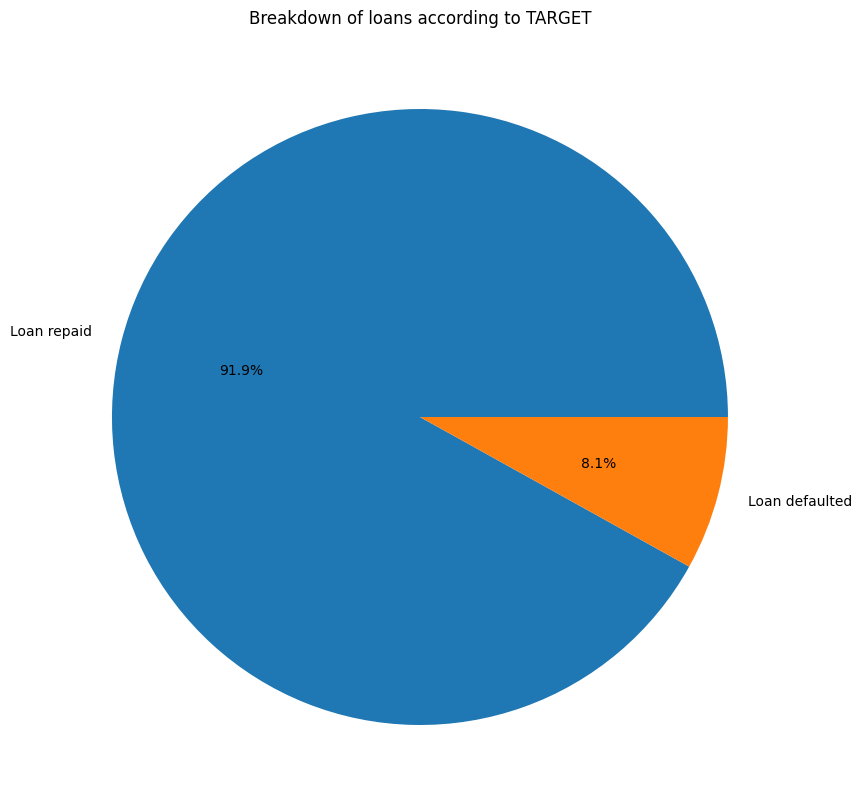

In [23]:
# Value counts for TARGET
target_counts = df_application_train['TARGET'].value_counts()

# Plot with labels and percentages
target_counts.plot(
    kind="pie",
    labels=["Loan repaid", "Loan defaulted"],
    autopct="%1.1f%%",
    title="Breakdown of loans according to TARGET",
    figsize=(10, 10)
)

plt.ylabel("")
plt.show()

In [24]:
def cat_stats(df, FEATURES):
    for feature in FEATURES:
        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index, 'value': temp.values})
        cat_perc_0 = df[df['TARGET'] == 0].groupby(feature).size().reset_index(name='Count_Target_0')
        cat_perc_1 = df[df['TARGET'] == 1].groupby(feature).size().reset_index(name='Count_Target_1')
        cat_perc = cat_perc_0.merge(cat_perc_1, how='left', on=feature).fillna(0)
        cat_perc['Percentage_Target_0'] = cat_perc['Count_Target_0'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc['Percentage_Target_1'] = cat_perc['Count_Target_1'] / (cat_perc['Count_Target_0'] + cat_perc['Count_Target_1']) * 100
        cat_perc.sort_values(by=feature, inplace=True)

        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))

        sns.set_color_codes("pastel")

        # Plot distribution for TARGET == 0
        sns.barplot(ax=ax1, x=feature, y="Percentage_Target_0", data=cat_perc)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

        # Plot distribution for TARGET == 1
        sns.barplot(ax=ax2, x=feature, y='Percentage_Target_1', data=cat_perc)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.show()

In [25]:
# Feature selection for exploration
important_features=['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

<ipython-input-24-81a4e68b7ebd>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-24-81a4e68b7ebd>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


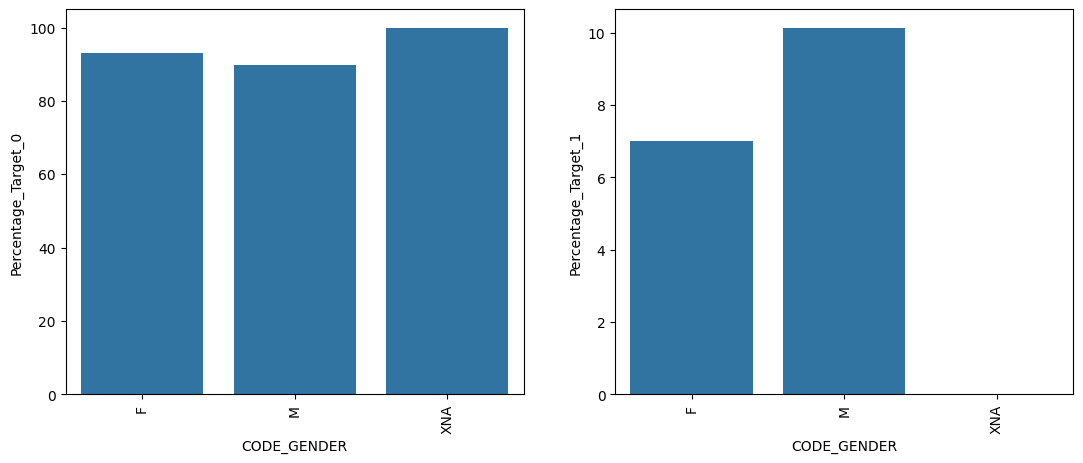

<ipython-input-24-81a4e68b7ebd>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-24-81a4e68b7ebd>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


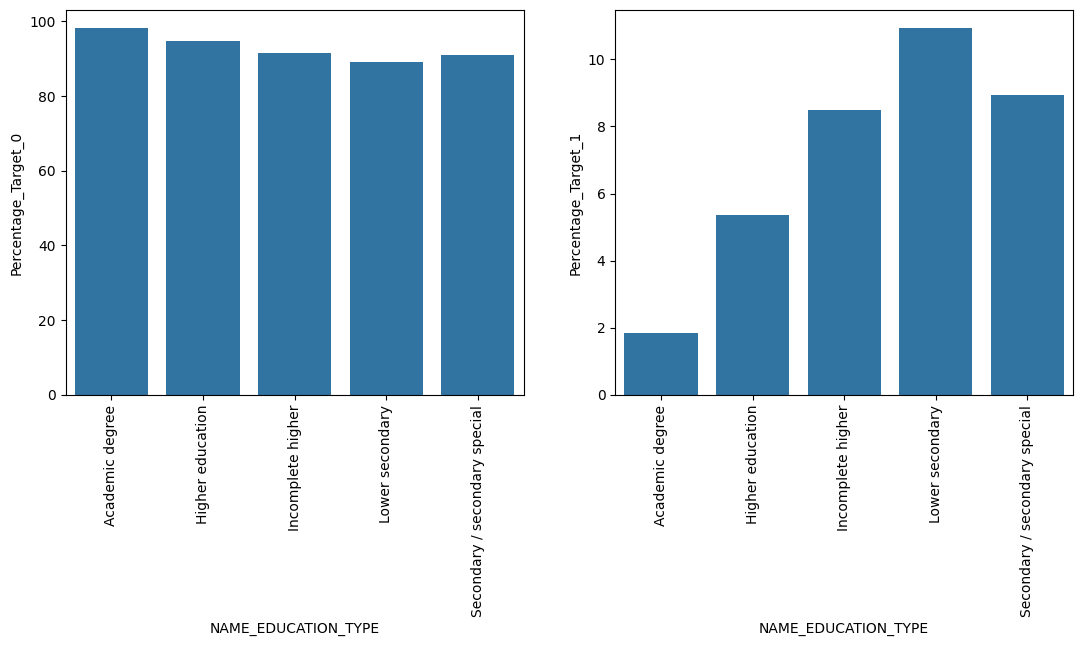

<ipython-input-24-81a4e68b7ebd>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-24-81a4e68b7ebd>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


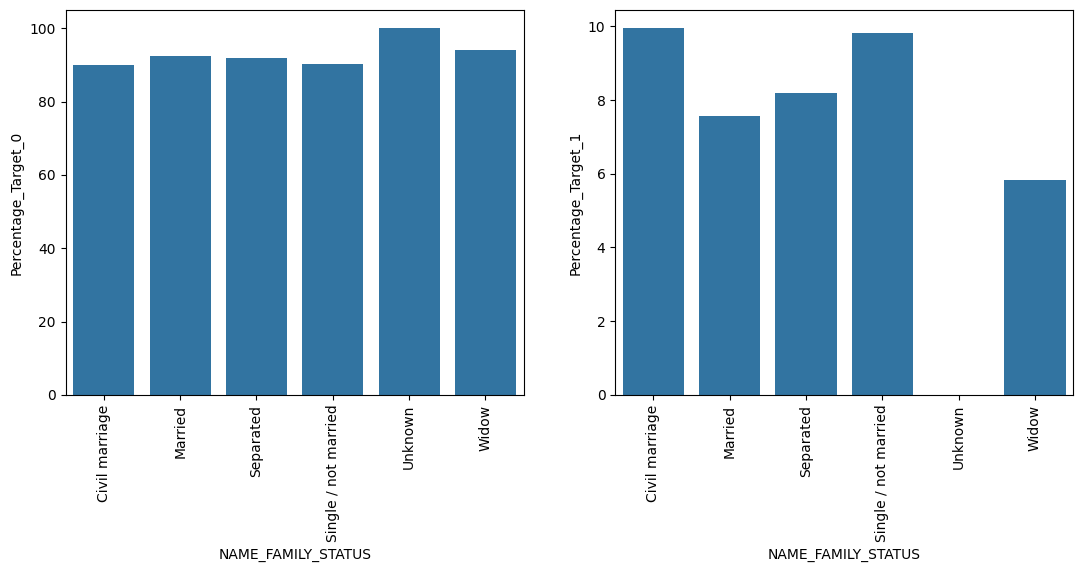

<ipython-input-24-81a4e68b7ebd>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-24-81a4e68b7ebd>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


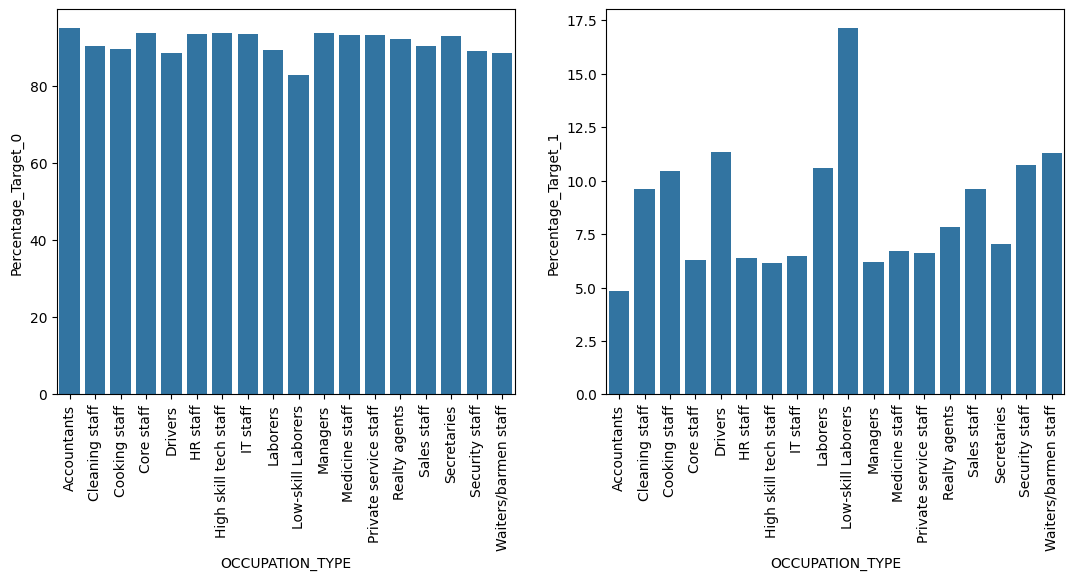

<ipython-input-24-81a4e68b7ebd>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-24-81a4e68b7ebd>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


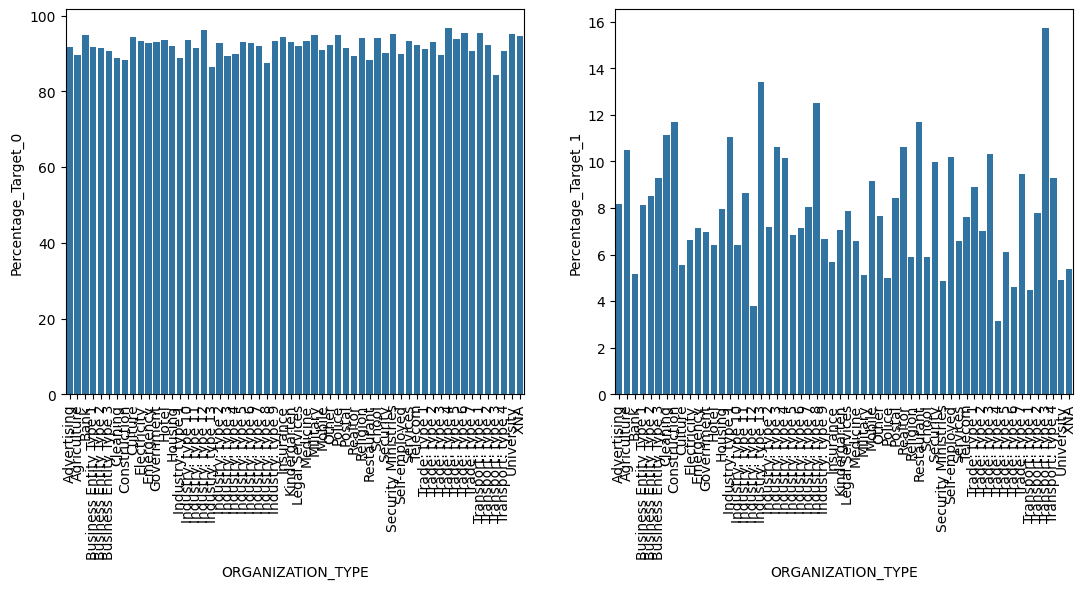

In [26]:
cat_stats(df_application_train,important_features)

## Feature Engineering


In [27]:
# Timer as a context manager
@contextmanager
def timer(title):
    t0 = time.time()
    try:
        yield
    finally:
        print(f"{title} - done in {time.time() - t0:.0f}s")

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows=None, nan_as_category=False):
    df = pd.read_csv('/content/drive/My Drive/Projet 7/application_train.csv', nrows=num_rows)
    test_df = pd.read_csv('/content/drive/My Drive/Projet 7/application_test.csv', nrows=num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    # Concatenate dataframes
    df = pd.concat([df, test_df], ignore_index=True)

    # Categorical features with Binary encode
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], _ = pd.factorize(df[bin_feature])

    # One-Hot encoding
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # NaN correction
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

    # Feature engineering
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    return df

# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]]\
        .groupby("feature")\
        .mean()\
        .sort_values(by="importance", ascending=False)[:40]\
        .index

    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')

# Main logic
def main(debug=False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    print(f"Data shape: {df.shape}")
    print(df.head())

# Entry point
if __name__ == "__main__":
    submission_file_name = "submission_kernel02.csv"
    with timer("Full model run"):
        main(debug=False)

Train samples: 307511, test samples: 48744
Data shape: (356255, 247)
   SK_ID_CURR  TARGET  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002     1.0            0             0                0   
1      100003     0.0            1             0                1   
2      100004     0.0            0             1                0   
3      100006     0.0            1             0                0   
4      100007     0.0            0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ...  WALLSMATERIAL_MODE_Panel  WALLSMA

In [28]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('/content/drive/My Drive/Projet 7/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('/content/drive/My Drive/Projet 7/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']

    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [29]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('/content/drive/My Drive/Projet 7/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

In [30]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('/content/drive/My Drive/Projet 7/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

In [31]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('/content/drive/My Drive/Projet 7/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

In [32]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('/content/drive/My Drive/Projet 7/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [33]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')

In [34]:
def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()

    return df

if __name__ == "__main__":
    submission_file_name = "submission_kernel02.csv"
    with timer("Full model run"):
        df = main()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 29s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 33s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 18s
Installments payments df shape: (339587, 26)
Process installments payments - done in 40s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 26s
Full model run - done in 153s


## Missing Data


In [35]:
def data_info(df):
    print("Shape of DataFrame:", df.shape)
    print("\nColumn Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nUnique Values per Column:")
    print(df.nunique())
    print("\nFirst 5 Rows:")
    print(df.head())

data_info(df)


Shape of DataFrame: (356255, 797)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Columns: 797 entries, SK_ID_CURR to CC_COUNT
dtypes: bool(133), float64(606), int64(42), object(16)
memory usage: 1.8+ GB
None

Missing Values:
SK_ID_CURR                               0
TARGET                               48744
CODE_GENDER                              0
FLAG_OWN_CAR                             0
FLAG_OWN_REALTY                          0
                                     ...  
CC_NAME_CONTRACT_STATUS_nan_MAX     252697
CC_NAME_CONTRACT_STATUS_nan_MEAN    252697
CC_NAME_CONTRACT_STATUS_nan_SUM     252697
CC_NAME_CONTRACT_STATUS_nan_VAR     253389
CC_COUNT                            252697
Length: 797, dtype: int64

Unique Values per Column:
SK_ID_CURR                          356255
TARGET                                   2
CODE_GENDER                              3
FLAG_OWN_CAR                             2
FLAG_OWN_REALTY                 

In [36]:
# Removing rows without target content
target_mask = df['TARGET'].isna()
df = df[~target_mask]

In [37]:
def filled_data_per(column):
    return column.notnull().mean() * 100
filled_data_per(df['TARGET'])


np.float64(100.0)

In [38]:
# Visualizing infinite values (positive and negative) and deleting them
infinite_mask = (df == np.inf) | (df == -np.inf)
rows_infinite = df[infinite_mask.any(axis=1)]

In [39]:
rows_infinite

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
5687,106652,0.0,1,0,1,0,112500.0,760225.5,30150.0,679500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60477,170117,0.0,1,1,0,2,140400.0,472500.0,44991.0,454500.0,...,False,0.000000,0.0,0.000000,False,False,0.0,0.0,0.0,12.0
79077,191663,0.0,1,0,0,1,157500.0,225000.0,16501.5,225000.0,...,False,0.000000,0.0,0.000000,False,False,0.0,0.0,0.0,9.0
89018,203360,0.0,0,0,1,0,112500.0,284400.0,16326.0,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98509,214375,1.0,0,1,1,1,157500.0,484659.0,38857.5,441000.0,...,True,0.020833,2.0,0.020614,False,False,0.0,0.0,0.0,96.0
126768,247019,0.0,0,1,1,0,135000.0,970380.0,28503.0,810000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128791,249387,0.0,0,1,0,0,112500.0,808650.0,26217.0,675000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140426,262837,0.0,1,0,0,2,202500.0,1125000.0,33025.5,1125000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152087,276278,0.0,1,0,1,0,126000.0,728460.0,38938.5,675000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167136,293754,0.0,1,1,0,0,256500.0,1129500.0,31189.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df = df[~infinite_mask.any(axis=1)]

In [41]:
df.shape

(307492, 797)

In [42]:
# Selecting features filled at 60% minimum and removing them
highly_missing_features=df.loc[:,df.isna().mean() >= 0.6]
highly_missing_features.columns

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       ...
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_NAME_CONTRACT_STATUS_nan_MIN',
       'CC_NAME_CONTRACT_STATUS_nan_MAX', 'CC_NAME_CONTRACT_STATUS_nan_MEAN',
       'CC_NAME_CONTRACT_STATUS_nan_SUM', 'CC_NAME_CONTRACT_STATUS_nan_VAR',
       'CC_COUNT'],
      dtype='object', length=212)

In [43]:
highly_missing_features.dtypes.value_counts()

,count
float64,196
object,16


In [44]:
df.drop(highly_missing_features, axis=1, inplace=True)

In [45]:
rows_missing = df[df.isnull().any(axis=1)]
rows_missing

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,7492.924286,52450.470,6605.910,12815.010,7492.924286,52450.470,-38.0,-156.285714,-1094.0,7.0
307507,456252,0.0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,10069.867500,60419.205,10046.880,10074.465,10069.867500,60419.205,-2327.0,-2393.833333,-14363.0,6.0
307508,456253,0.0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,4399.707857,61595.910,27.270,5575.185,4115.915357,57622.815,-1738.0,-2387.428571,-33424.0,14.0
307509,456254,1.0,1,0,0,0,171000.0,370107.0,20205.0,319500.0,...,10239.832895,194556.825,2296.440,19065.825,10239.832895,194556.825,-18.0,-161.263158,-3064.0,19.0


In [46]:
# Deleting rows with missing values
filled_df = df.dropna()
filled_df.reset_index(drop=True, inplace=True)
data_info(filled_df)

Shape of DataFrame: (9361, 585)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9361 entries, 0 to 9360
Columns: 585 entries, SK_ID_CURR to INSTAL_COUNT
dtypes: bool(133), float64(410), int64(42)
memory usage: 33.5 MB
None

Missing Values:
SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                                 ..
INSTAL_AMT_PAYMENT_SUM            0
INSTAL_DAYS_ENTRY_PAYMENT_MAX     0
INSTAL_DAYS_ENTRY_PAYMENT_MEAN    0
INSTAL_DAYS_ENTRY_PAYMENT_SUM     0
INSTAL_COUNT                      0
Length: 585, dtype: int64

Unique Values per Column:
SK_ID_CURR                        9361
TARGET                               2
CODE_GENDER                          2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
                                  ... 
INSTAL_AMT_PAYMENT_SUM            9355
INSTAL_DAYS_ENTRY_PAYM

In [47]:
filled_df.dtypes.value_counts()

,count
float64,410
bool,133
int64,42


## Imputing Numerical Data


In [48]:
# Select only boolean columns
boolean_features = filled_df.select_dtypes(include=['bool'])

# Select only numerical columns
numerical_features = filled_df.select_dtypes(include=['float64', 'int64'])

# Create a SimpleImputer instance for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
imputed_numerical_features = numerical_imputer.fit_transform(numerical_features)
imputed_numerical_df = pd.DataFrame(imputed_numerical_features, columns=numerical_features.columns)

# Concatenate boolean features back to the imputed DataFrame
imputed_df = pd.concat([imputed_numerical_df, boolean_features], axis=1)

data_info(imputed_df)

Shape of DataFrame: (9361, 585)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9361 entries, 0 to 9360
Columns: 585 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: bool(133), float64(452)
memory usage: 33.5 MB
None

Missing Values:
SK_ID_CURR                         0
TARGET                             0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
                                  ..
WALLSMATERIAL_MODE_Panel           0
WALLSMATERIAL_MODE_Stone, brick    0
WALLSMATERIAL_MODE_Wooden          0
EMERGENCYSTATE_MODE_No             0
EMERGENCYSTATE_MODE_Yes            0
Length: 585, dtype: int64

Unique Values per Column:
SK_ID_CURR                         9361
TARGET                                2
CODE_GENDER                           2
FLAG_OWN_CAR                          2
FLAG_OWN_REALTY                       2
                                   ... 
WALLSMATERIAL_MODE_Panel              2
WALL

## Final DF


In [49]:
# Finding correlations with the target and sort
correlations = imputed_df.corr()['TARGET'].sort_values()

# Selecting the top 15 most correlated features
top_correlated_features = correlations.head(15).index

# Creating a correlation matrix for the selected features
correlation_matrix = imputed_df[top_correlated_features].corr()

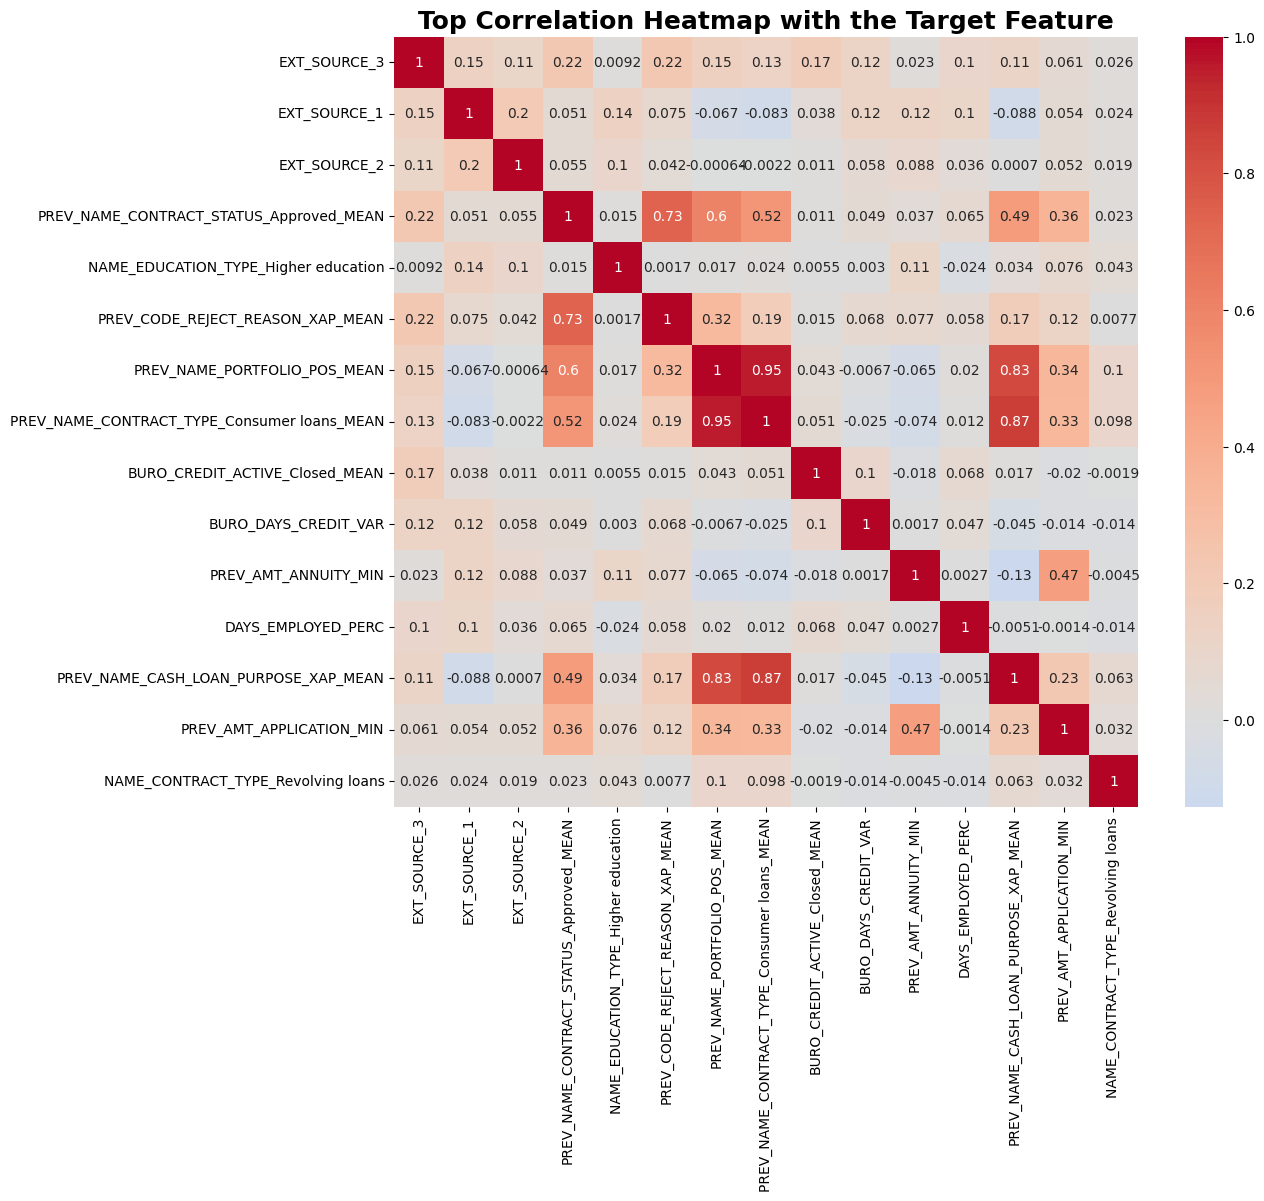

In [50]:
# Heatmap
plt.figure(figsize=(12, 10))  # Adjust the figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Top Correlation Heatmap with the Target Feature', fontsize=18, weight = 'bold')
plt.show()

# MODELISATION


## Splitting Training and Testing Dataset

In [51]:
# Full dataset is too big for modelisation so selecting only x%
sampled_df = imputed_df.sample(frac=0.5, random_state=27)

In [52]:
X = sampled_df.drop(columns='TARGET').copy()
y = sampled_df['TARGET'].copy()


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Scoring and Metrics

In [54]:
def custom_metric(y, y_pred):
    TP = np.sum( (y==1) & (y_pred==1) )
    FP = np.sum( (y==0) & (y_pred==1) )
    TN = np.sum( (y==0) & (y_pred==0) )
    FN = np.sum( (y==1) & (y_pred==0) )

    PPV = TP / (TP + FP)
# Positive predictive value TPR
    TPR = TP / (TP + FN)
    FMI = np.sqrt( PPV * TPR )
    return FMI

def custom_metric_f2(y, y_pred):
    return fbeta_score(y, y_pred,beta=2)

custom_scorer = make_scorer(custom_metric, greater_is_better=True )
custom_scorer_f2 = make_scorer(custom_metric_f2, greater_is_better=True )


In [55]:
# test
def custom_metric_2(y, y_pred):
    FP = np.sum( (y==0) & (y_pred==1) )
    FN = np.sum( (y==1) & (y_pred==0) )

    FMI = (10 * FN) + FP
    return FMI

def custom_metric_f2(y, y_pred):
    return fbeta_score(y, y_pred,beta=2)

custom_scorer = make_scorer(custom_metric, greater_is_better=True )
custom_scorer_f2 = make_scorer(custom_metric_f2, greater_is_better=True )

In [56]:
def model_eval_score(model, Xval, yval):
    yval_pred = model.predict(Xval)
    conf_mat = confusion_matrix(yval, yval_pred)
    print(conf_mat)

    accuracy = accuracy_score(yval, yval_pred)
    precision = precision_score(yval, yval_pred)
    recall = recall_score(yval, yval_pred)
    f1 = f1_score(yval, yval_pred)
    f2 = fbeta_score(yval, yval_pred, beta=2)
    rocauc = roc_auc_score(yval, yval_pred)
    custom_fmi = custom_metric(yval, yval_pred)

    print(f'Accuracy score    : {accuracy:.3}')
    print(f'Precision score   : {precision:.3}')
    print(f'Recall score      : {recall:.3}')
    print(f'F1 score          : {f1:.3}')
    print(f'F2 score          : {f2:.3}')
    print(f'ROC AUC score      : {rocauc:.3}')
    print(f'Custom metric FMI : {custom_fmi:.3}')

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("f2_score", f2)
    mlflow.log_metric("roc_auc", rocauc)
    mlflow.log_metric("custom_metric_fmi", custom_fmi)
    print()

def model_eval(model, Xval, yval):
    model_eval_score(model, Xval, yval)

    yval_proba = model.predict_proba(Xval)[:, 1]
    fpr, tpr, thresholds = roc_curve(yval, yval_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    # Show plot
    plt.show()

## Simple Model

### Without adjusting to the oversampling

2025/04/29 07:52:48 INFO mlflow.tracking.fluent: Experiment with name 'Simple_Models_Experiment' does not exist. Creating a new experiment.


Running Logistic Regression
[[1084    1]
 [  85    0]]
Accuracy score    : 0.926
Precision score   : 0.0
Recall score      : 0.0
F1 score          : 0.0
F2 score          : 0.0
ROC AUC score      : 0.5
Custom metric FMI : 0.0



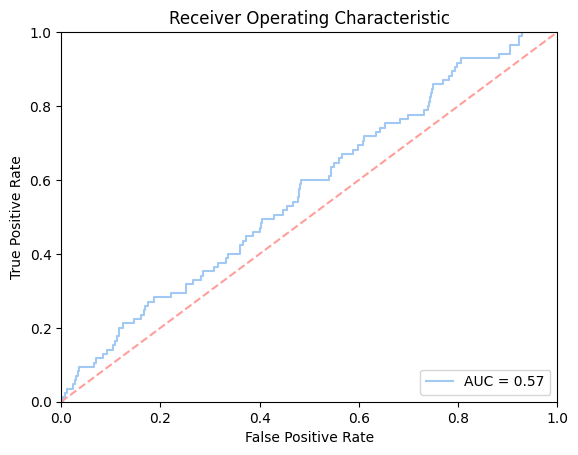

2025/04/29 07:52:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running Decision Tree
[[1005   80]
 [  77    8]]
Accuracy score    : 0.866
Precision score   : 0.0909
Recall score      : 0.0941
F1 score          : 0.0925
F2 score          : 0.0935
ROC AUC score      : 0.51
Custom metric FMI : 0.0925



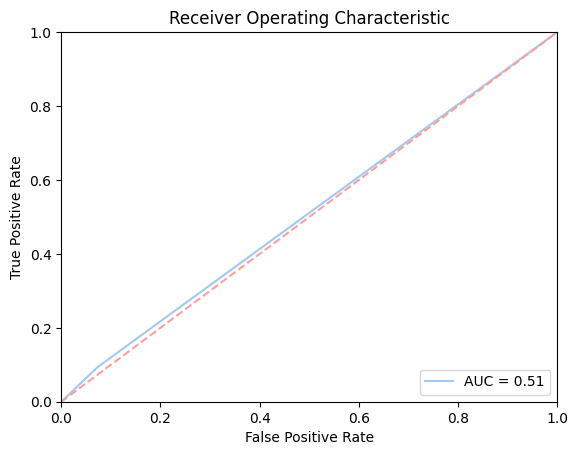

2025/04/29 07:53:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running Linear Discriminant Analysis
[[1056   29]
 [  80    5]]
Accuracy score    : 0.907
Precision score   : 0.147
Recall score      : 0.0588
F1 score          : 0.084
F2 score          : 0.0668
ROC AUC score      : 0.516
Custom metric FMI : 0.093



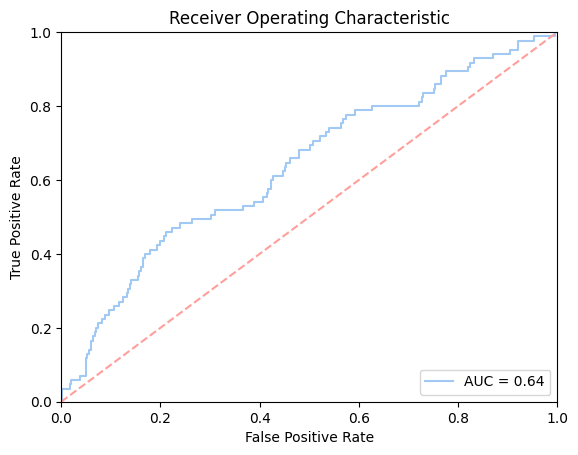

2025/04/29 07:53:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [57]:
# Define the estimators
estimators = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Start an MLflow experiment
mlflow.set_experiment("Simple_Models_Experiment")

# Loop through the estimators and train models
for name, model in estimators.items():
    with mlflow.start_run() as run:
        print("Running " + name)

        # Train the model on the selected features
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict_proba(X_test)[:, 1]

        # Print the metrics of the model
        model_eval(model, X_test, y_test)

        # Log parameters and metrics to MLflow
        mlflow.log_params({"model": name})

        # Log model artifact
        model_path = "models/" + name + ".joblib"
        mlflow.sklearn.log_model(model, model_path)

        # End MLFlow run
        mlflow.end_run()

### Adjusting to the oversampling

In [58]:
# Apply SMOTE oversampling to the training data
smote = SMOTE()
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)
imblearn_pipeline = Pipeline([
    ('smote', SMOTE()),
    ('model', None)
])

## Dummy Classifier

In [59]:
# Create a Dummy Classifier with the chosen strategy
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

# Fit the Dummy Classifier to the training data
dummy.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy.predict_proba(X_test)[:, 1]

# Print the metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1085
         1.0       0.00      0.00      0.00        85

    accuracy                           0.93      1170
   macro avg       0.46      0.50      0.48      1170
weighted avg       0.86      0.93      0.89      1170



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Logistic regression, Decision tree and Linear discriminant analysis

2025/04/29 07:53:11 INFO mlflow.tracking.fluent: Experiment with name 'Simple_Models_Experiment_smote' does not exist. Creating a new experiment.


Running Logistic Regression
[[713 372]
 [ 45  40]]
Accuracy score    : 0.644
Precision score   : 0.0971
Recall score      : 0.471
F1 score          : 0.161
F2 score          : 0.266
ROC AUC score      : 0.564
Custom metric FMI : 0.214



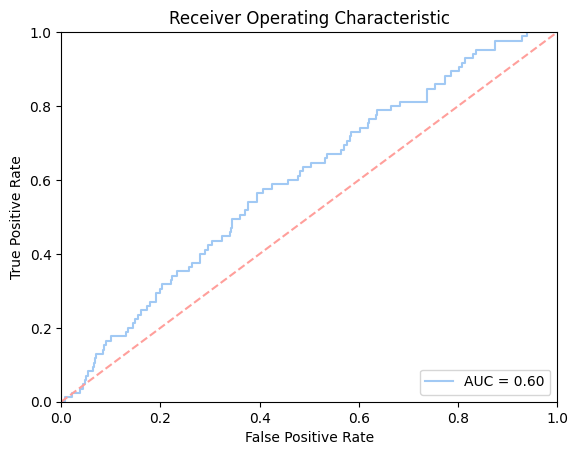

2025/04/29 07:53:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running Decision Tree
[[990  95]
 [ 70  15]]
Accuracy score    : 0.859
Precision score   : 0.136
Recall score      : 0.176
F1 score          : 0.154
F2 score          : 0.167
ROC AUC score      : 0.544
Custom metric FMI : 0.155



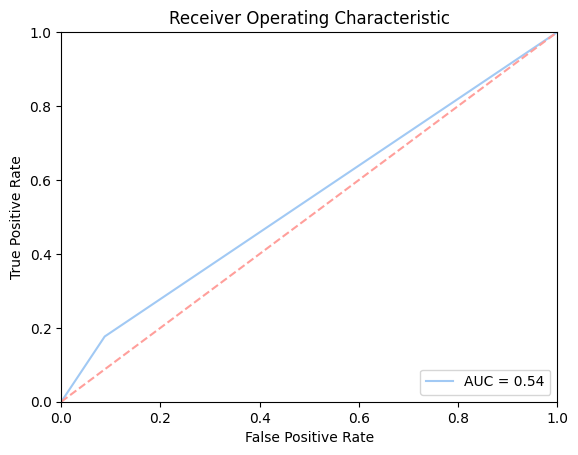

2025/04/29 07:53:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running Linear Discriminant Analysis
[[1083    2]
 [  85    0]]
Accuracy score    : 0.926
Precision score   : 0.0
Recall score      : 0.0
F1 score          : 0.0
F2 score          : 0.0
ROC AUC score      : 0.499
Custom metric FMI : 0.0



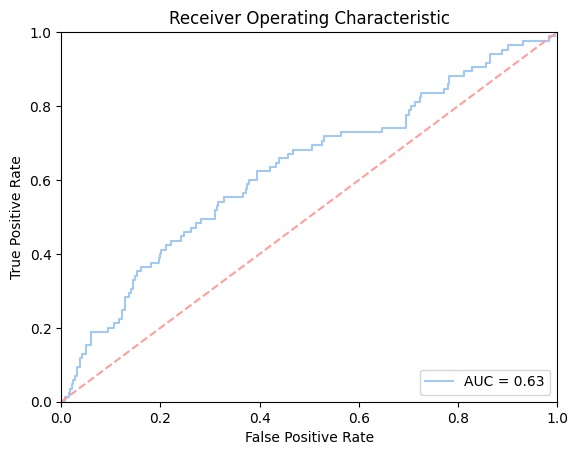

2025/04/29 07:53:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [60]:
# Define the estimators
estimators = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Start an MLflow experiment
mlflow.set_experiment("Simple_Models_Experiment_smote")

# Loop through the estimators and train models
for name, model in estimators.items():
    with mlflow.start_run() as run:
        print("Running " + name)

        # Set the model in the pipeline
        imblearn_pipeline.set_params(model=model)

        # Fit the pipeline on the training data
        imblearn_pipeline.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = imblearn_pipeline.named_steps['model'].predict_proba(X_test)[:, 1]

        # Print the metrics of the model
        model_eval(model, X_test, y_test)

        # Log model artifact
        model_path = "models/" + name + ".joblib"
        mlflow.sklearn.log_model(model, model_path)

        # End MLFlow run
        mlflow.end_run()

### With Gridsearch

2025/04/29 07:53:30 INFO mlflow.tracking.fluent: Experiment with name 'Simple_Models_Experiment_cv_smote' does not exist. Creating a new experiment.


Running Logistic Regression
[[709 376]
 [ 45  40]]
Accuracy score    : 0.64
Precision score   : 0.0962
Recall score      : 0.471
F1 score          : 0.16
F2 score          : 0.265
ROC AUC score      : 0.562
Custom metric FMI : 0.213



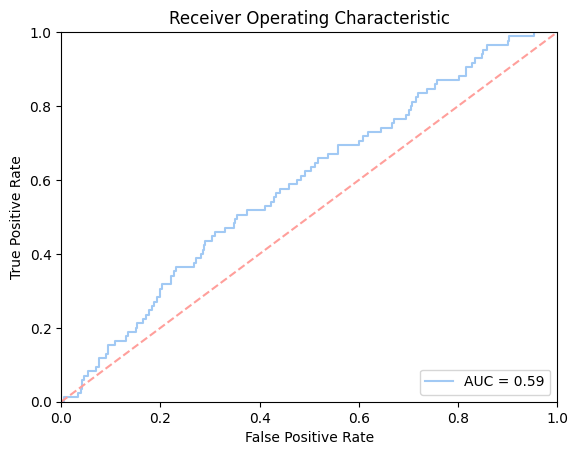

2025/04/29 07:53:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best parameters for Logistic Regression: {'model__C': 0.01}

Running Decision Tree
[[983 102]
 [ 71  14]]
Accuracy score    : 0.852
Precision score   : 0.121
Recall score      : 0.165
F1 score          : 0.139
F2 score          : 0.154
ROC AUC score      : 0.535
Custom metric FMI : 0.141



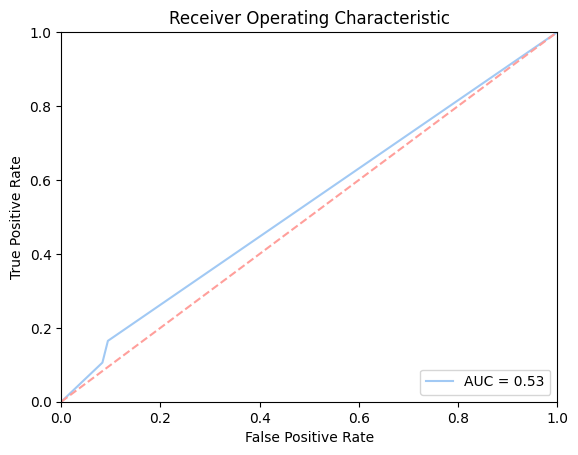

2025/04/29 07:54:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best parameters for Decision Tree: {'model__max_depth': 30}

Running Linear Discriminant Analysis


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, **las

[[1083    2]
 [  85    0]]
Accuracy score    : 0.926
Precision score   : 0.0
Recall score      : 0.0
F1 score          : 0.0
F2 score          : 0.0
ROC AUC score      : 0.499
Custom metric FMI : 0.0



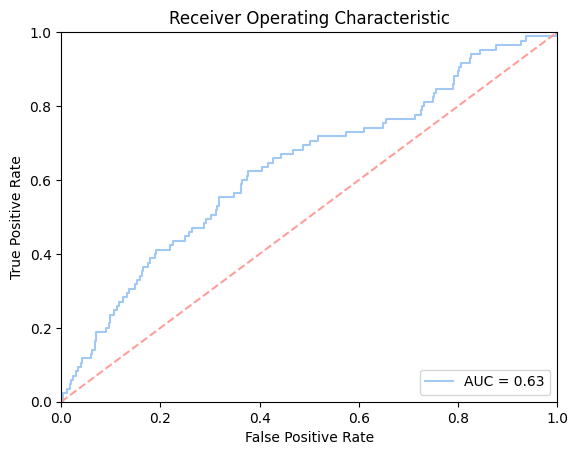

2025/04/29 07:54:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best parameters for Linear Discriminant Analysis: {'model__solver': 'svd'}



In [61]:
# Define the estimators and their corresponding hyperparameter grids
estimators = {
    'Logistic Regression': (LogisticRegression(solver='liblinear'), {'model__C': [0.001, 0.01, 0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'model__max_depth': [None, 10, 20, 30]}),
    'Linear Discriminant Analysis': (LinearDiscriminantAnalysis(), {'model__solver': ['svd', 'lsqr', 'eigen']})
}

# Start an MLflow experiment
mlflow.set_experiment("Simple_Models_Experiment_cv_smote")

# Loop through the estimators and perform GridSearchCV
for name, (model, param_grid) in estimators.items():
    with mlflow.start_run() as run:
        print("Running " + name)

        # Set the model in the imblearn pipeline
        imblearn_pipeline.set_params(model=model)

        # Define GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(imblearn_pipeline, param_grid, cv=3, scoring='roc_auc')

        # Fit GridSearchCV on the training data
        grid_search.fit(X_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Make predictions on the test data
        y_pred = best_model.named_steps['model'].predict_proba(X_test)[:, 1]

        # Print the metrics of the best model
        model_eval(best_model, X_test, y_test)

        # Log best parameters
        best_params = grid_search.best_params_
        mlflow.log_params(best_params)

        # Log model artifact
        model_path = "models/" + name + "_best_model.joblib"
        mlflow.sklearn.log_model(best_model, model_path)

        # End MLFlow run
        mlflow.end_run()

        print(f"Best parameters for {name}: {best_params}\n")


## XGBoost


2025/04/29 07:54:40 INFO mlflow.tracking.fluent: Experiment with name 'xgb_smote' does not exist. Creating a new experiment.


[[1067   18]
 [  82    3]]
Accuracy score    : 0.915
Precision score   : 0.143
Recall score      : 0.0353
F1 score          : 0.0566
F2 score          : 0.0416
ROC AUC score      : 0.509
Custom metric FMI : 0.071



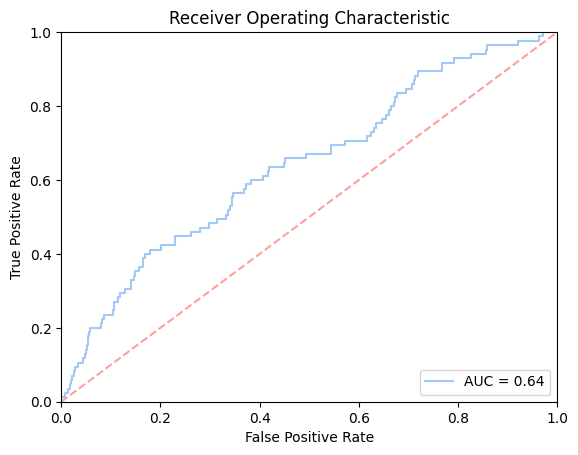

2025/04/29 07:54:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [62]:
# Create an instance of the XGBClassifier class
xgb = XGBClassifier(n_estimators=100, subsample=0.4, random_state=1)

# Start an MLflow experiment
mlflow.set_experiment("xgb_smote")

with mlflow.start_run() as run:
    # Fit the model to the training data
    xgb.fit(X_train_smt, y_train_smt)

    # Make predictions on the test data
    y_pred = xgb.predict_proba(X_test)[:, 1]

    # Printing metrics
    model_eval(xgb, X_test, y_test)

    # Log model artifact
    model_path = "models/xgb_model.joblib"
    mlflow.sklearn.log_model(xgb, model_path)

    # End MLFlow run
    mlflow.end_run()

2025/04/29 07:54:53 INFO mlflow.tracking.fluent: Experiment with name 'xgb_smote_grid_search' does not exist. Creating a new experiment.


Running XGBoost
[[1073   12]
 [  81    4]]
Accuracy score    : 0.921
Precision score   : 0.25
Recall score      : 0.0471
F1 score          : 0.0792
F2 score          : 0.0562
ROC AUC score      : 0.518
Custom metric FMI : 0.108



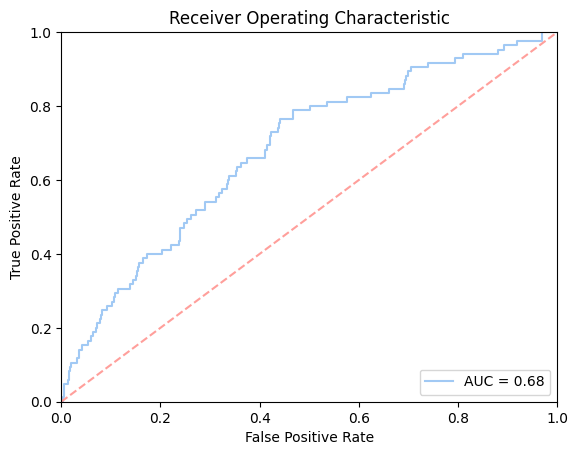

2025/04/29 08:05:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best parameters for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100}



In [63]:
# Define the estimators and their corresponding hyperparameter grids
estimators = {
    'XGBoost': (XGBClassifier(n_estimators=100, subsample=0.4, random_state=1), {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.1, 0.3]
    })
}

# Start an MLflow experiment
mlflow.set_experiment("xgb_smote_grid_search")

# Loop through the estimators and perform GridSearchCV
for name, (model, param_grid) in estimators.items():
    with mlflow.start_run() as run:
        print("Running " + name)

        # Set the model in the imblearn pipeline
        imblearn_pipeline.set_params(model=model)

        # Define GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(imblearn_pipeline, param_grid, cv=3, scoring='roc_auc')

        # Fit GridSearchCV on the training data
        grid_search.fit(X_train, y_train)

        # Get the best model from GridSearchCV
        best_xgb_model = grid_search.best_estimator_

        # Make predictions on the test data
        y_pred = best_xgb_model.named_steps['model'].predict_proba(X_test)[:, 1]

        # Print the metrics of the best model
        model_eval(best_xgb_model, X_test, y_test)

        # Log best hyperparameters
        best_params = grid_search.best_params_
        mlflow.log_params(best_params)

        # Log model artifact
        model_path = "models/" + name + "_best_model.joblib"
        mlflow.sklearn.log_model(best_xgb_model, model_path)

        # End MLFlow run
        mlflow.end_run()

        print(f"Best parameters for {name}: {best_params}\n")

## Random Forest

2025/04/29 08:05:12 INFO mlflow.tracking.fluent: Experiment with name 'random_forest_smote' does not exist. Creating a new experiment.


[[1078    7]
 [  84    1]]
Accuracy score    : 0.922
Precision score   : 0.125
Recall score      : 0.0118
F1 score          : 0.0215
F2 score          : 0.0144
ROC AUC score      : 0.503
Custom metric FMI : 0.0383



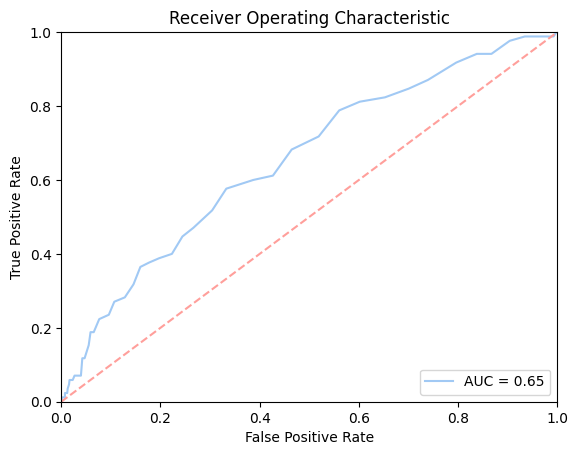

2025/04/29 08:05:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [64]:
# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Start an MLflow experiment
mlflow.set_experiment("random_forest_smote")

with mlflow.start_run() as run:
    # Fit the model to the training data
    rf.fit(X_train_smt, y_train_smt)

    # Make predictions on the test data
    y_pred = rf.predict_proba(X_test)[:, 1]

    # Printing metrics
    model_eval(rf, X_test, y_test)

    # Log model artifact
    model_path = "models/" + name + ".joblib"
    mlflow.sklearn.log_model(rf, model_path)

    # End MLFlow run
    mlflow.end_run()

2025/04/29 08:05:28 INFO mlflow.tracking.fluent: Experiment with name 'rf_smote_grid_search' does not exist. Creating a new experiment.


Running Random Forest
[[1078    7]
 [  83    2]]
Accuracy score    : 0.923
Precision score   : 0.222
Recall score      : 0.0235
F1 score          : 0.0426
F2 score          : 0.0287
ROC AUC score      : 0.509
Custom metric FMI : 0.0723



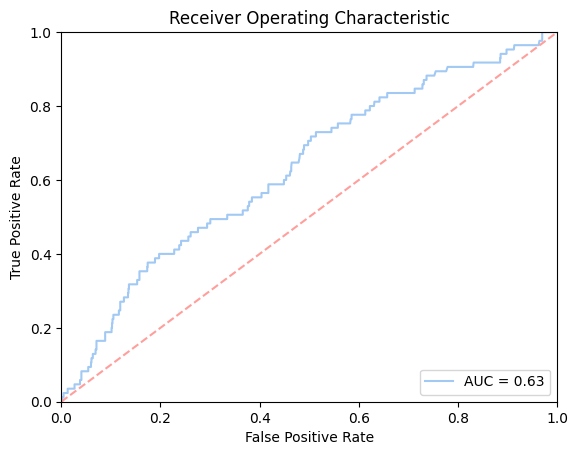

2025/04/29 08:33:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best parameters for Random Forest: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}



In [65]:
# Define the estimators and their corresponding hyperparameter grids
estimators = {
    'Random Forest': (RandomForestClassifier(n_estimators=100, random_state=1), {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    })
}

# Start an MLflow experiment
mlflow.set_experiment("rf_smote_grid_search")

# Loop through the estimators and perform GridSearchCV
for name, (model, param_grid) in estimators.items():
    with mlflow.start_run() as run:
        print("Running " + name)

        # Set the model in the imblearn pipeline
        imblearn_pipeline.set_params(model=model)

        # Define GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(imblearn_pipeline, param_grid, cv=3, scoring='roc_auc')

        # Fit GridSearchCV on the training data
        grid_search.fit(X_train, y_train)

        # Get the best model from GridSearchCV
        best_rf_model = grid_search.best_estimator_

        # Make predictions on the test data
        y_pred = best_model.named_steps['model'].predict_proba(X_test)[:, 1]

        # Print the metrics of the best model
        model_eval(best_rf_model, X_test, y_test)

        # Log best hyperparameters
        best_params = grid_search.best_params_
        mlflow.log_params(best_params)

        # Log model artifact
        model_path = "models/" + name + "_best_model.joblib"
        mlflow.sklearn.log_model(best_rf_model, model_path)

        # End MLFlow run
        mlflow.end_run()

        print(f"Best parameters for {name}: {best_params}\n")

2025/04/29 08:33:34 INFO mlflow.tracking.fluent: Experiment with name 'random_forest_smote_grid_search' does not exist. Creating a new experiment.


[[1079    6]
 [  83    2]]
Accuracy score    : 0.924
Precision score   : 0.25
Recall score      : 0.0235
F1 score          : 0.043
F2 score          : 0.0287
ROC AUC score      : 0.509
Custom metric FMI : 0.0767



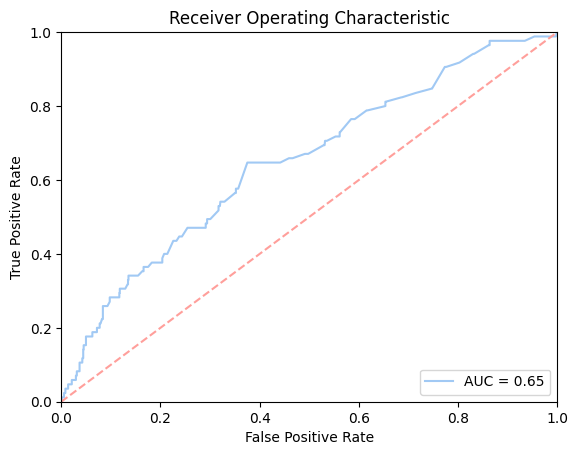

2025/04/29 09:17:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [66]:
# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Define a hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Start an MLflow experiment
mlflow.set_experiment("random_forest_smote_grid_search")

# Perform GridSearchCV
with mlflow.start_run() as run:
    # Create GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train_smt, y_train_smt)

    # Get the best parameters and the corresponding model
    best_params = grid_search.best_params_
    best_rf_model = grid_search.best_estimator_

    # Make predictions on the test data using the best model
    y_pred = best_rf_model.predict_proba(X_test)[:, 1]

    # Printing metrics
    model_eval(best_rf_model, X_test, y_test)

    # Log model artifact
    model_path = "models/rf_best_model.joblib"
    mlflow.sklearn.log_model(best_rf_model, model_path)

    # End MLFlow run
    mlflow.end_run()

## SVM

2025/04/29 09:27:08 INFO mlflow.tracking.fluent: Experiment with name 'svm_smote' does not exist. Creating a new experiment.


[[1033   52]
 [  79    6]]
Accuracy score    : 0.888
Precision score   : 0.103
Recall score      : 0.0706
F1 score          : 0.0839
F2 score          : 0.0754
ROC AUC score      : 0.511
Custom metric FMI : 0.0855



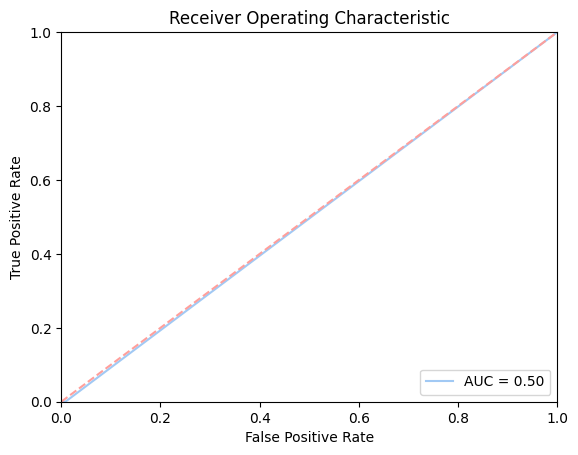

2025/04/29 09:28:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [69]:
# Create an instance of the SVM classifier
svm = SVC(kernel='rbf', C=1.0, probability=True, random_state=1)

# Start an MLflow experiment
mlflow.set_experiment("svm_smote")

with mlflow.start_run() as run:
    # Fit the SVM model to the training data
    svm.fit(X_train_smt, y_train_smt)

    # Make predictions on the test data
    y_pred = svm.predict_proba(X_test)[:, 1]

    # Printing metrics
    model_eval(svm, X_test, y_test)

    # Log model artifact
    model_path = "models/svm_model.joblib"
    mlflow.sklearn.log_model(svm, model_path)

    # End MLFlow run
    mlflow.end_run()

In [ ]:
# Define the estimators and their corresponding hyperparameter grids
estimators = {
    'SVM': (SVC(probability=True, random_state=1), {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__degree': [2, 3, 4],
    })
}

# Start an MLflow experiment
mlflow.set_experiment("svm_smote_grid_search")

# Loop through the estimators and perform GridSearchCV
for name, (model, param_grid) in estimators.items():
    with mlflow.start_run() as run:
        print("Running " + name)

        # Set the model in the imblearn pipeline
        imblearn_pipeline.set_params(model=model)

        # Define GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(imblearn_pipeline, param_grid, cv=3, scoring='roc_auc')

        # Fit GridSearchCV on the training data
        grid_search.fit(X_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Make predictions on the test data
        y_pred = best_model.named_steps['model'].predict_proba(X_test)[:, 1]

        # Print the metrics of the best model
        model_eval(best_model, X_test, y_test)

        # Log best hyperparameters
        best_params = grid_search.best_params_
        mlflow.log_params(best_params)

        # Log model artifact
        model_path = "models/" + name + "_best_model.joblib"
        mlflow.sklearn.log_model(best_model, model_path)

        # End MLFlow run
        mlflow.end_run()

        print(f"Best parameters for {name}: {best_params}\n")

2025/04/29 09:28:48 INFO mlflow.tracking.fluent: Experiment with name 'svm_smote_grid_search' does not exist. Creating a new experiment.


Running SVM


In [ ]:
# Creating an instance of the SVM classifier
svm = SVC(kernel='rbf', C=1.0, probability=True, random_state=1)

# Defining a hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Starting the MLflow experiment
mlflow.set_experiment("svm_smote_grid_search")

# Performing GridSearchCV
with mlflow.start_run() as run:
    # Creating GridSearchCV
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

    # Fitting GridSearchCV to the training data
    grid_search.fit(X_train_smt, y_train_smt)

    # Get the best parameters and the corresponding model
    best_params = grid_search.best_params_
    best_svm_model = grid_search.best_estimator_

    # Make predictions on the test data using the best model
    y_pred = best_svm_model.predict_proba(X_test)[:, 1]

    # Printing metrics
    model_eval(best_svm_model, X_test, y_test)

    # Log model artifact
    model_path = "models/svm_best_model.joblib"
    mlflow.sklearn.log_model(best_svm_model, model_path)

    # End MLFlow run
    mlflow.end_run()

# FEATURE IMPORTANCE

In [ ]:
xgb_model = imblearn_pipeline.named_steps['model']

xgb_model.fit(X_train, y_train)

explainer = shap.Explainer(xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the summary
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)